# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
from tensorflow.keras.datasets import cifar10

# Splitting training and testing data

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 1142s 7us/step


In [4]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [5]:
fig_class=[ "airplane", "automobile","bird","cat","deer", "dog","frog","horse","ship","truck"]

# Describe data

In [6]:
x_train[0].shape

(32, 32, 3)

C:\Users\user\AppData\Local\Temp\ipykernel_13468\1813797259.py:12: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(f'{y_train[i]} : {fig_class[int(y_train[i])]}')


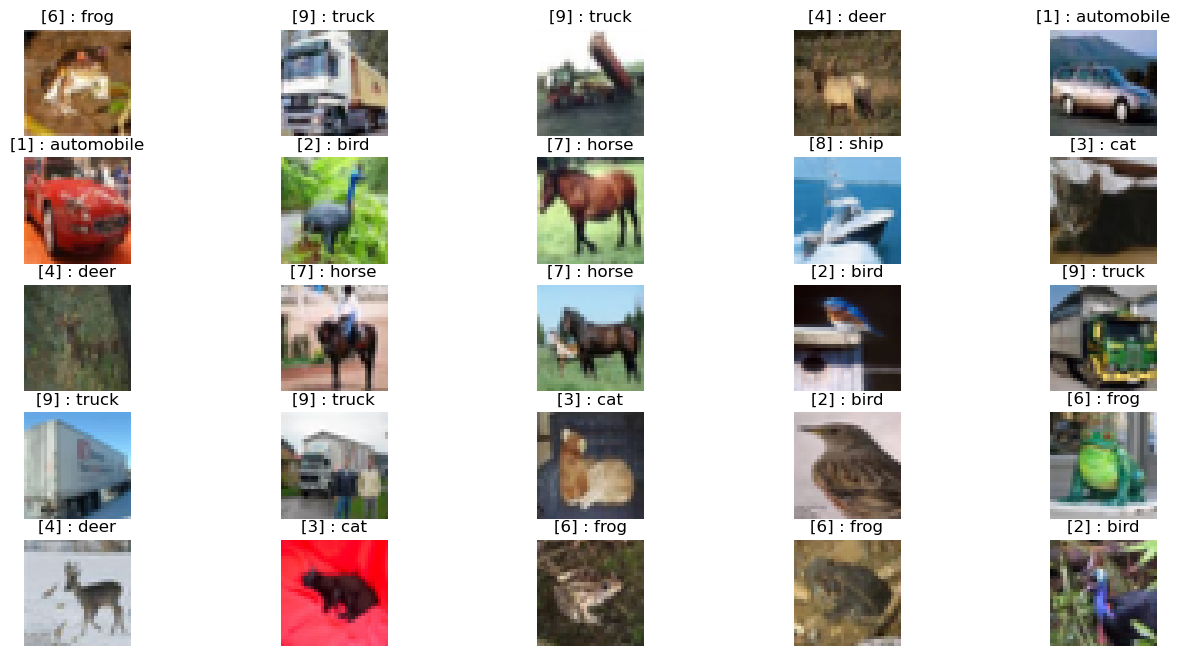

In [7]:
#create figure
fig=plt.figure(figsize=(16,8))

#setting values to rows and columns
rows=5
columns=5

for i in range(25):
    fig.add_subplot(rows,columns,i+1)
    plt.imshow(x_train[i])
    plt.axis('off')
    plt.title(f'{y_train[i]} : {fig_class[int(y_train[i])]}')

In [8]:
print(len(x_train))
x_train.shape
#50k worth of train datas

50000


(50000, 32, 32, 3)

In [9]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [10]:
#Searching for max value of pixel
max=0
for i in range(0,50000):
    max_comp=x_train[i].max()
    if (max < max_comp):
        max=max_comp
print (max)

255


# normalizing

In [11]:
x_train=x_train/max
x_test=x_test/max

In [12]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [13]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

## To Categorical

In [14]:
from tensorflow.keras.utils import to_categorical
#as we are dealing with multiple classification

In [15]:
y_cat_train=to_categorical(y_train,10)
y_cat_test=to_categorical(y_test,10)

## Define Model

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [17]:
# Sequential

model=Sequential()

# 3*3 filter decreases our 32x32 size by 2 in each rows and columns making it 30x30
# relu gives max (0,x)

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32,32,3), activation='relu'))

# 3x3 filter again decrease by 2 making it 28x28
# 2x2 pool size decreases by 2 making it 14x14
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# 5*5 filter now decreases 14*14 data size to 10*10 by decreasing 4 in each rows and columns
model.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu'))

# 5x5 filter again decreases 10x10 data size to 6x6 by decreasing 4 in each rows and column
# 2x2 maxpplsize thus divide 6x6 to 3x3
model.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# flattens multidimension to single dimension
model.add(Flatten())

model.add(Dense(256, activation='relu'))

# Output layer as 10 categories exists
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

c:\Users\user\anaconda3\envs\primeai\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary()
# params = output_size * (input_size + 1) for dense layers
# params = output_channels * (input_channels * filter_size + 1) for conv layers

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 6, 6, 64)       │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 314,154 (1.20 MB)

 Trainable params: 314,154 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

### To prevent Overfitting

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

In [20]:
early_stop=EarlyStopping(monitor='val_loss', patience=3)

In [21]:
start_time = time.time()

model.fit(x_train, y_cat_train, epochs=15, batch_size=64, validation_data=(x_test, y_cat_test), callbacks=[early_stop])

end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time}", "seconds")

Epoch 1/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 38ms/step - accuracy: 0.3361 - loss: 1.7874 - val_accuracy: 0.5055 - val_loss: 1.3477
Epoch 2/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.5688 - loss: 1.2056 - val_accuracy: 0.6151 - val_loss: 1.0854
Epoch 3/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.6410 - loss: 1.0045 - val_accuracy: 0.6665 - val_loss: 0.9398
Epoch 4/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.6915 - loss: 0.8763 - val_accuracy: 0.6729 - val_loss: 0.9216
Epoch 5/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.7254 - loss: 0.7785 - val_accuracy: 0.7108 - val_loss: 0.8290
Epoch 6/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.7487 - loss: 0.7179 - val_accuracy: 0.7091 - val_loss: 0.8548
Epoch 7/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.7662 - loss: 0.6616 - val_accuracy: 0.7185 - val_loss: 0.8298
Epoch 8/15
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.7895 - loss: 0.5916 - 

## Visualize Results


In [24]:
metrics = pd.DataFrame(model.history.history)

<Axes: >

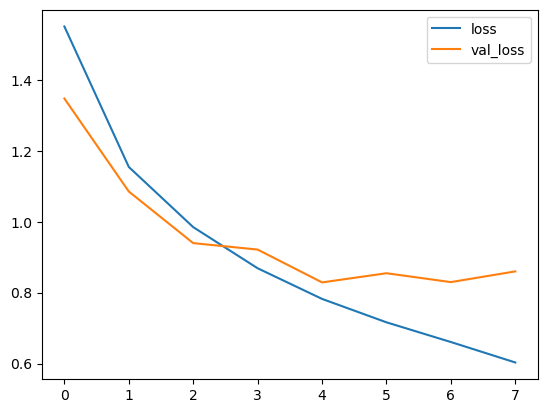

In [25]:
metrics[['loss', 'val_loss']].plot()

<Axes: >

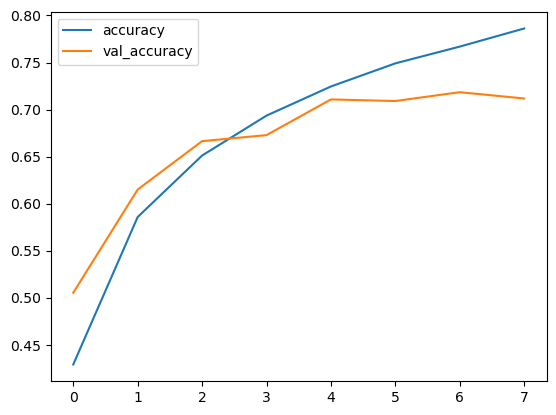

In [26]:
metrics[['accuracy', 'val_accuracy']].plot()

## Evaluate

In [27]:
model.evaluate(x_test,y_cat_test)
prediction = model.predict(x_test)
predictions = [np.argmax(x, axis=0) for x in prediction]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7182 - loss: 0.8443
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


### Metrics

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76      1000
           1       0.91      0.77      0.83      1000
           2       0.68      0.59      0.63      1000
           3       0.46      0.51      0.48      1000
           4       0.77      0.59      0.67      1000
           5       0.48      0.79      0.60      1000
           6       0.85      0.73      0.79      1000
           7       0.82      0.69      0.75      1000
           8       0.83      0.84      0.84      1000
           9       0.84      0.80      0.82      1000

    accuracy                           0.71     10000
   macro avg       0.74      0.71      0.72     10000
weighted avg       0.74      0.71      0.72     10000



In [30]:
import seaborn as sns

<Axes: >

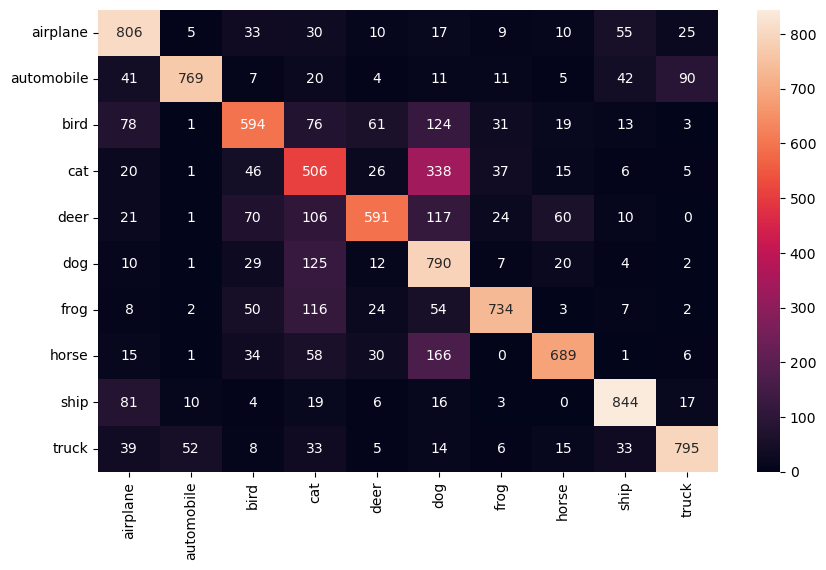

In [31]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, predictions),annot=True,fmt='d',xticklabels=fig_class,yticklabels=fig_class)

## Evaluate on chosen data

In [32]:
import random

CORRECT PREDICTIONS


C:\Users\user\AppData\Local\Temp\ipykernel_13468\2412578997.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  if(int(y_test[i])==prediction_value and for_random):
C:\Users\user\AppData\Local\Temp\ipykernel_13468\2412578997.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(f"Predicted: {fig_class[int(prediction_value)]} || Actual: {fig_class[int(y_test[i])]}")


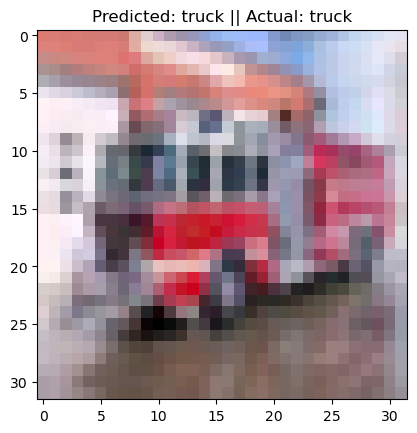

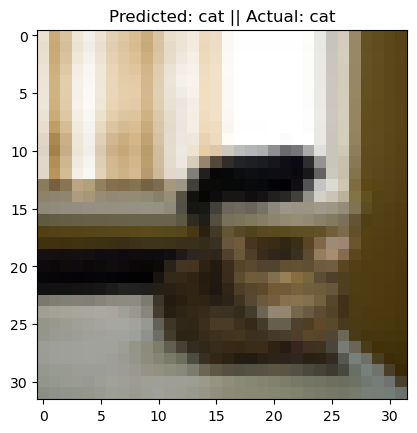

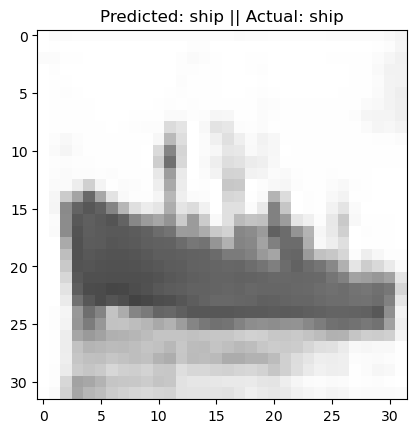

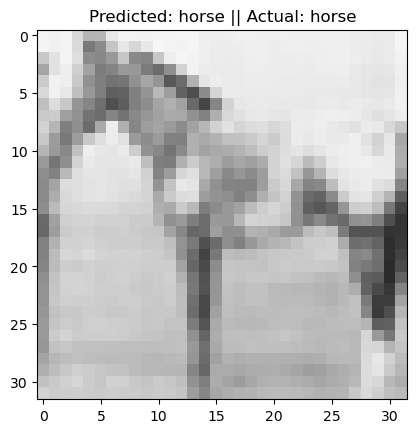

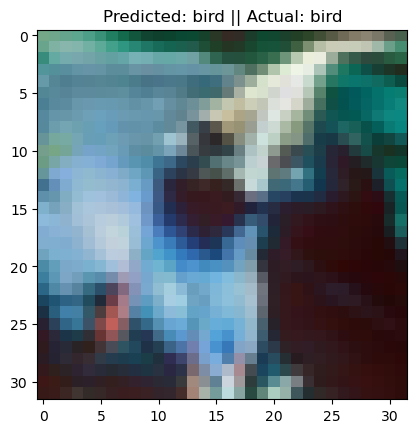

In [33]:
#Lets see which predictions were correct and which were incorrect
count=0
print("CORRECT PREDICTIONS")
#Correct Predictions:
for i in range(0,10000):
    #to randomly check our sample data
    for_random=np.random.binomial(n=1,p=0.1,size=[1])
    
    #our test datas
    test_image=x_test[i].reshape(1,32,32,3)
    #gives back the prediction
    predict_image=model.predict(test_image,verbose=0)
    prediction_value=np.argmax(predict_image,axis=1)
    
    #plotting
    if(int(y_test[i])==prediction_value and for_random):
            plt.title(f"Predicted: {fig_class[int(prediction_value)]} || Actual: {fig_class[int(y_test[i])]}")
            plt.imshow(x_test[i])
            plt.show()
            count+=1
    if count == 5:
        break
            

INCORRECT PREDICTIONS


C:\Users\user\AppData\Local\Temp\ipykernel_13468\2527979180.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  if(int(y_test[i])!=prediction_value and for_random):
C:\Users\user\AppData\Local\Temp\ipykernel_13468\2527979180.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(f"Predicted: {fig_class[int(prediction_value)]} || Actual: {fig_class[int(y_test[i])]}")


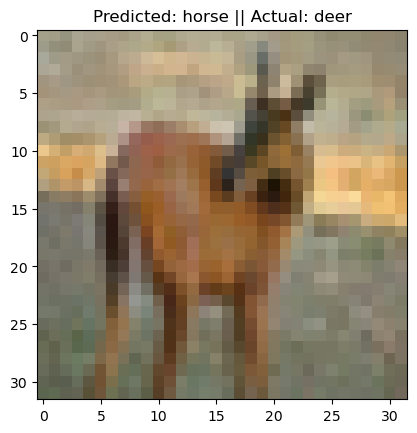

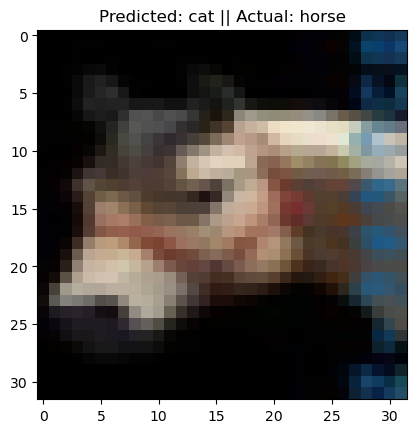

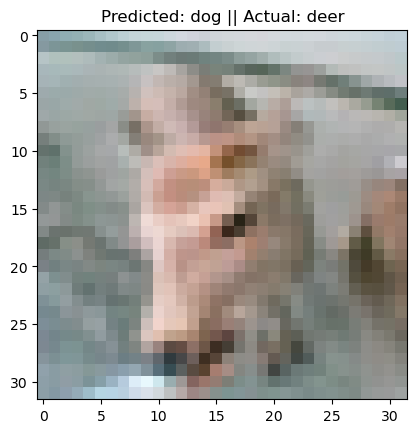

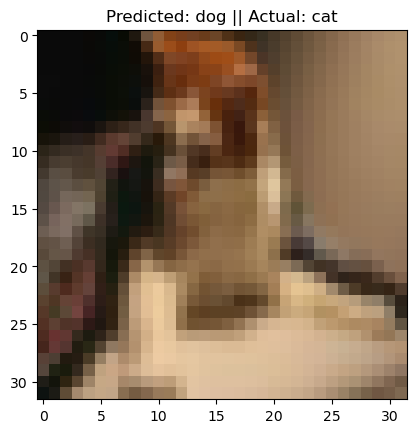

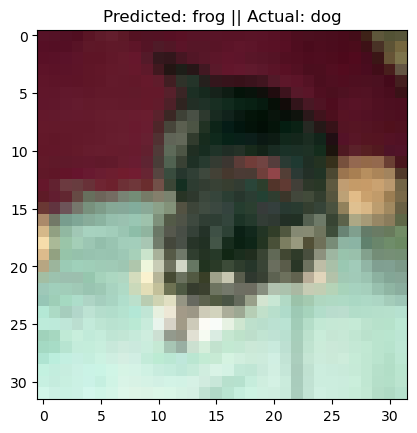

In [34]:
#Lets see which predictions were incorrect 
count=0
print("INCORRECT PREDICTIONS")
#InCorrect Predictions:
for i in range(0,10000):
    #to randomly check our sample data
    for_random=np.random.binomial(n=1,p=0.1,size=[1])
    
    #our test datas
    test_image=x_test[i].reshape(1,32,32,3)
    #gives back the prediction
    predict_image=model.predict(test_image,verbose=0)
    prediction_value=np.argmax(predict_image,axis=1)
    
    #plotting
    if(int(y_test[i])!=prediction_value and for_random):
            plt.title(f"Predicted: {fig_class[int(prediction_value)]} || Actual: {fig_class[int(y_test[i])]}")
            plt.imshow(x_test[i])
            plt.show()
            count+=1
    if count == 5:
        break
            


In [35]:
def predict_classes(image,index):
    #image_resize=image.resize(32,32)
    image_reshape=image.reshape(1,32,32,3)
    predict_image=model.predict(image_reshape,verbose=0)
    prediction_value=int(np.argmax(predict_image,axis=1))
    plt.title(f"Predicted: {fig_class[prediction_value]} || Actual: {fig_class[int(y_test[index])]}")
    plt.imshow(image)
    plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_13468\1205305819.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prediction_value=int(np.argmax(predict_image,axis=1))
C:\Users\user\AppData\Local\Temp\ipykernel_13468\1205305819.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(f"Predicted: {fig_class[prediction_value]} || Actual: {fig_class[int(y_test[index])]}")


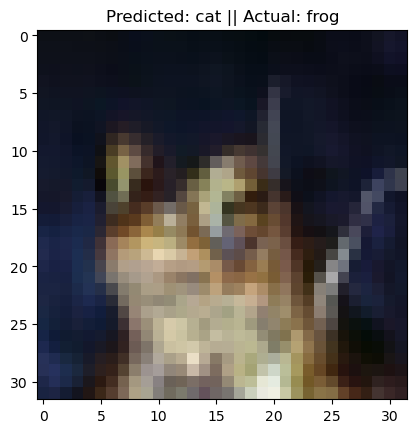

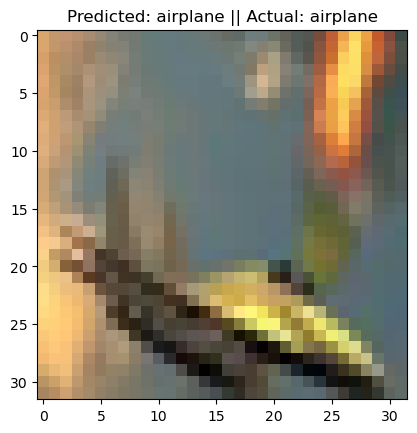

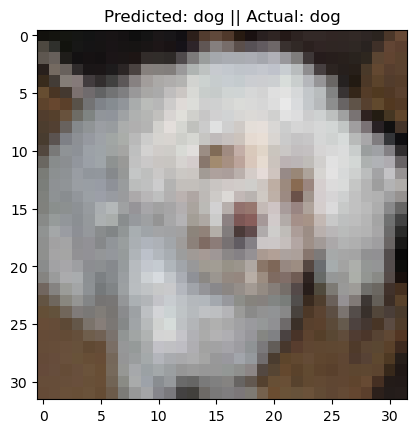

In [36]:
predict_classes(x_test[1034],1034)
predict_classes(x_test[125],125)
predict_classes(x_test[1000],1000)

In [37]:
model.save('model/CNN_CIFAR10.h5')

## Predict real life images

In [38]:
import cv2
import matplotlib.image as image
from numpy import array

from tensorflow import keras
model2=keras.models.load_model('model/CNN_CIFAR10.h5')

In [39]:
def predict_externalImg_classes(image,index):
    #image_resize=image.resize((32,32))
    image_reshape=image.reshape(1,32,32,3)
    predict_image=model.predict(image_reshape,verbose=0)
    prediction_value=int(np.argmax(predict_image,axis=1))
    plt.title(f"Predicted: {fig_class[prediction_value]} || Actual: {fig_class[index]}")
    plt.imshow(image)
    plt.show()
    

C:\Users\user\AppData\Local\Temp\ipykernel_13468\3470939157.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prediction_value=int(np.argmax(predict_image,axis=1))


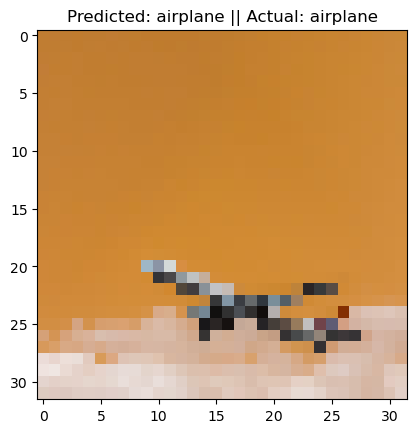

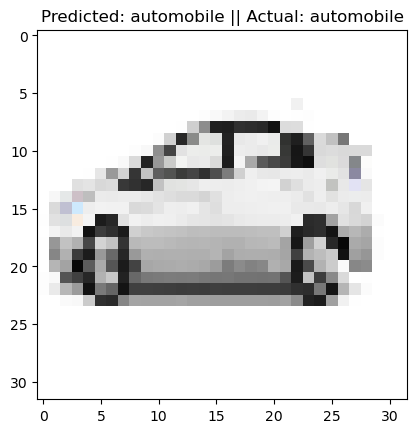

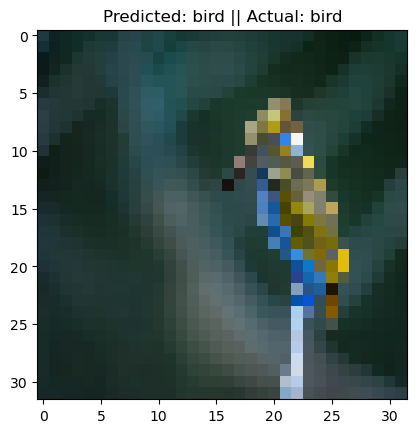

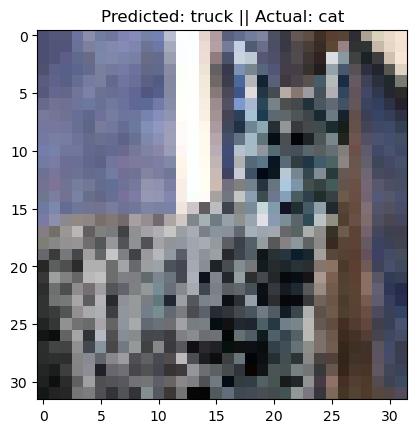

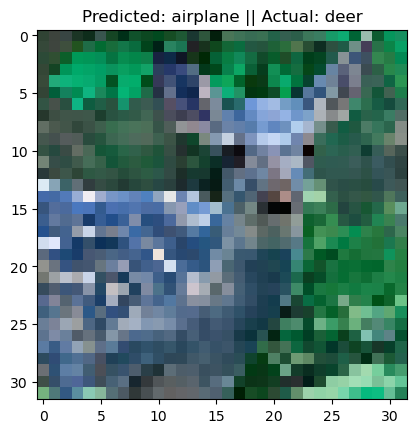

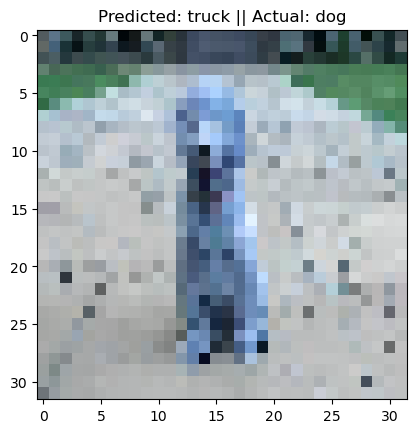

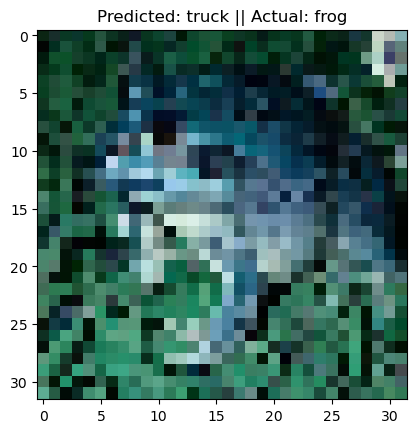

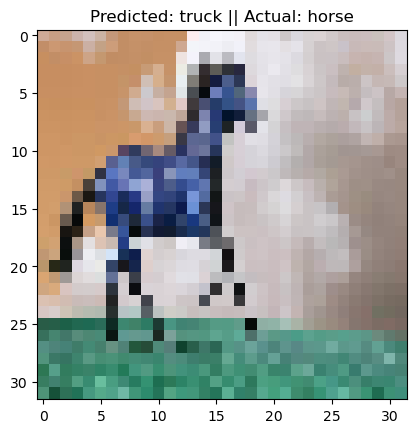

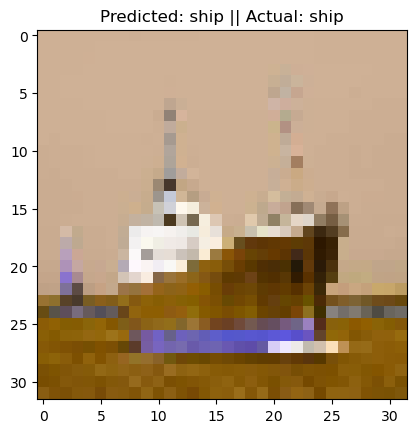

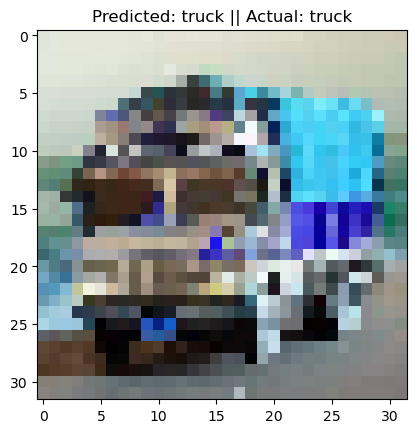

In [40]:
#Predicting External Image
for i in range (0,10):
    image=cv2.imread(rf"photo/{i}.jfif")
    image=cv2.resize(image, (32, 32))
    predict_externalImg_classes(image,i)